In [595]:
library(data.table)
library(tidyverse)
library(ggrepel)
library(ggpubr)
library(pheatmap)
library(cowplot)
library(paletteer)
library(grid)
library(gtable)
source("utils.R")

#### Files read in

In [363]:
umap <- fread("~/HSPC_zenedo/Fig1/meta.txt")

#### Fig1b

In [367]:
## estimate the cluster number position
dat_all <- data.frame(sample = character(length = length(level)), 
                      X = numeric(length = length(level)), 
                      Y = numeric(length = length(level)))
for(i in 1:length(level)){
  dat <- data.frame(X = umap[which(umap$cluster==level[i]), ]$umap_1, 
                    Y = umap[which(umap$cluster==level[i]), ]$umap_2)
  dat_all$sample[i] <- level[i]
  dat_all$X[i] <- mean(dat$X)
  dat_all$Y[i] <- mean(dat$Y)
}
dat_all$Cluster_number <- 1:nrow(dat_all)
dat_all$Label <- paste0(dat_all$Cluster_number, "-", dat_all$sample)

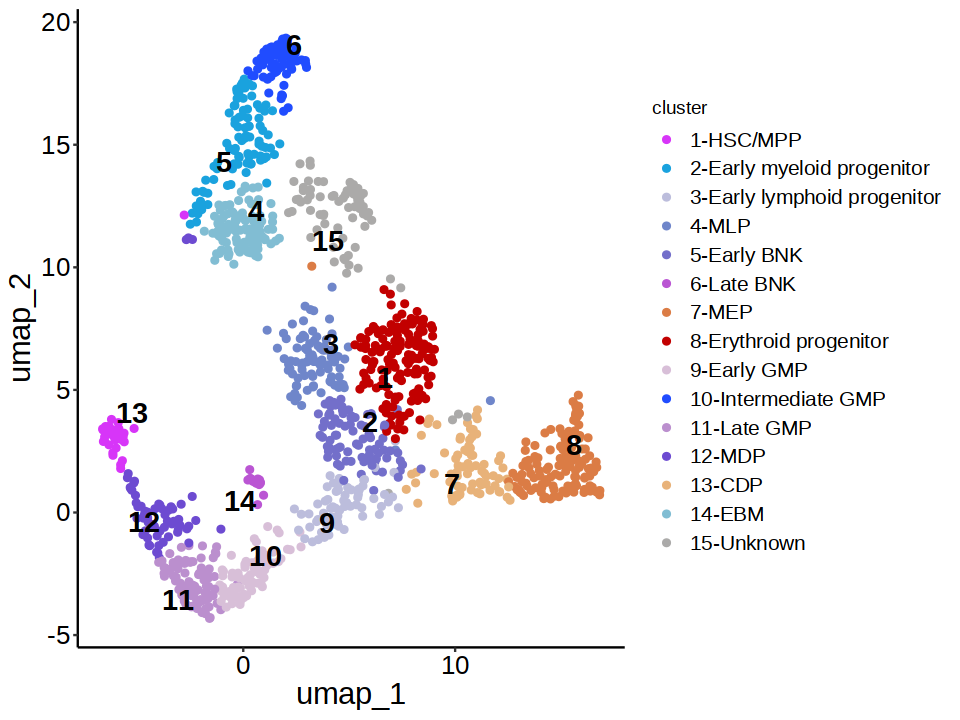

In [370]:
# plot
options(repr.plot.width=8, repr.plot.height=6)
ggplot() + 
    geom_point(data = umap, mapping = aes(x=umap_1, y=umap_2, color=cluster)) + 
    scale_color_manual(values = col, labels = dat_all$Label) +
    geom_text_repel(data = dat_all, mapping = aes(x = X, y = Y), label = dat_all$Cluster_number, size = 6, fontface = "bold") + 
    theme_classic() + 
    cPlotOpts

#### Fig1c

In [371]:
umap$gene_count <- umap$Coding_genes / 1000
umap$transcript2 <- umap$transcript / 1000000
umap$cluster <- factor(umap$cluster, levels = level)

In [372]:
# plot
options(repr.plot.width=12, repr.plot.height=6)

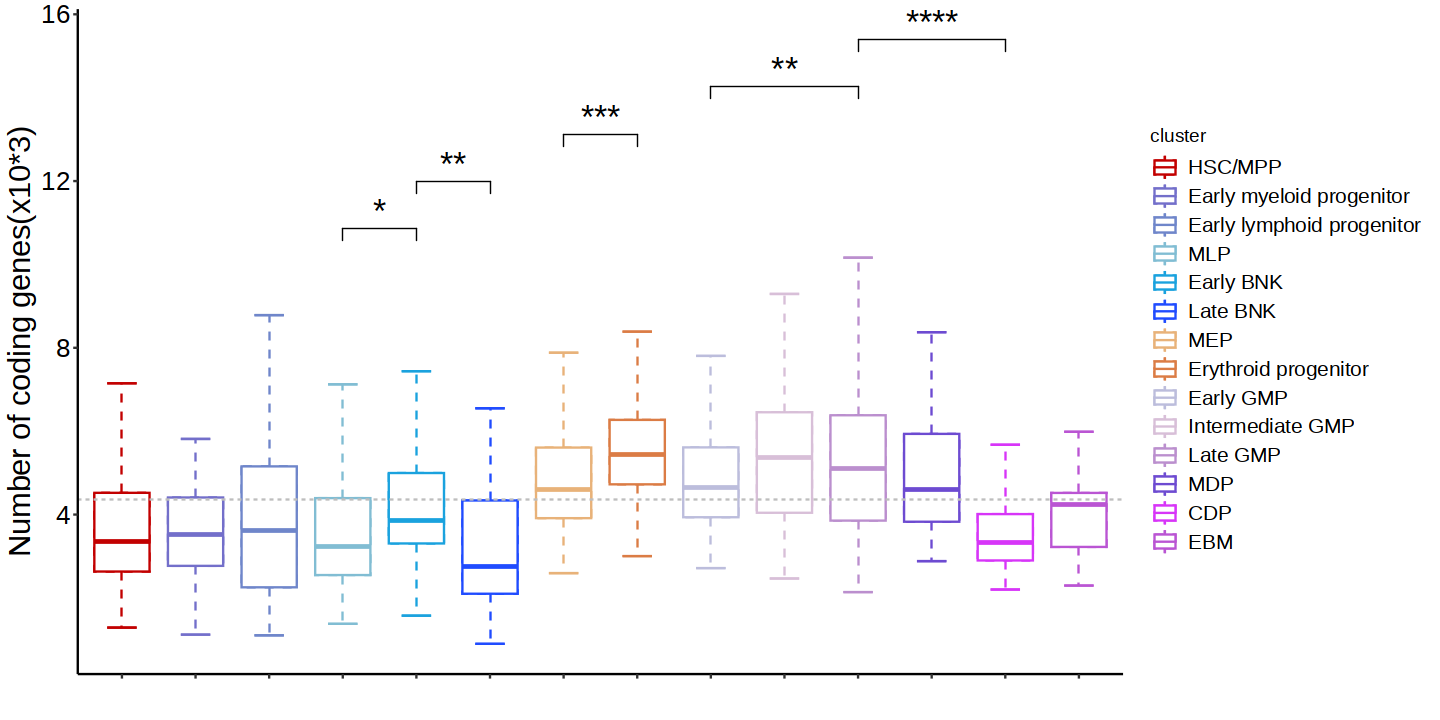

In [382]:
# gene count
gene_count <- umap[, c("cluster", "gene_count")] %>% 
                setNames(c("cluster", "value")) %>% 
                rmoutliers(., level) %>%
                filter(., cluster != "Unknown")
ggplot(gene_count, aes(x=cluster, y=value, color=cluster)) +
    geom_boxplot(linetype="99", outlier.shape = NA) + 
    stat_boxplot(geom = "errorbar",aes(ymin=..ymax..),
               width=0.4) + 
    stat_boxplot(geom = "errorbar",aes(ymax=..ymin..),
               width=0.4) + 
    stat_boxplot(aes(ymin=..lower..,ymax=..upper.., color=cluster), outlier.shape = NA) +
    scale_color_manual(values=col) +
    theme_classic() +
    stat_compare_means(comparisons = list(c("MLP", "Early BNK"), c("Early BNK", "Late BNK"), c("MEP", "Erythroid progenitor"), 
                                          c("Early GMP", "Late GMP"), c("Late GMP", "CDP")), map_signif_level = T,
                       step_increase=0.05, tip_length=0, method="t.test", 
                       size = 7, textsize = 6, label = "p.signif") +
    geom_hline(yintercept = mean(gene_count$value), lty = 2, color="grey") + 
    xlab("") + ylab("Number of coding genes(x10*3)") +
    #coord_cartesian(ylim = c(0, 10)) + 
    theme(axis.text.x = element_blank()) + 
    cPlotOpts

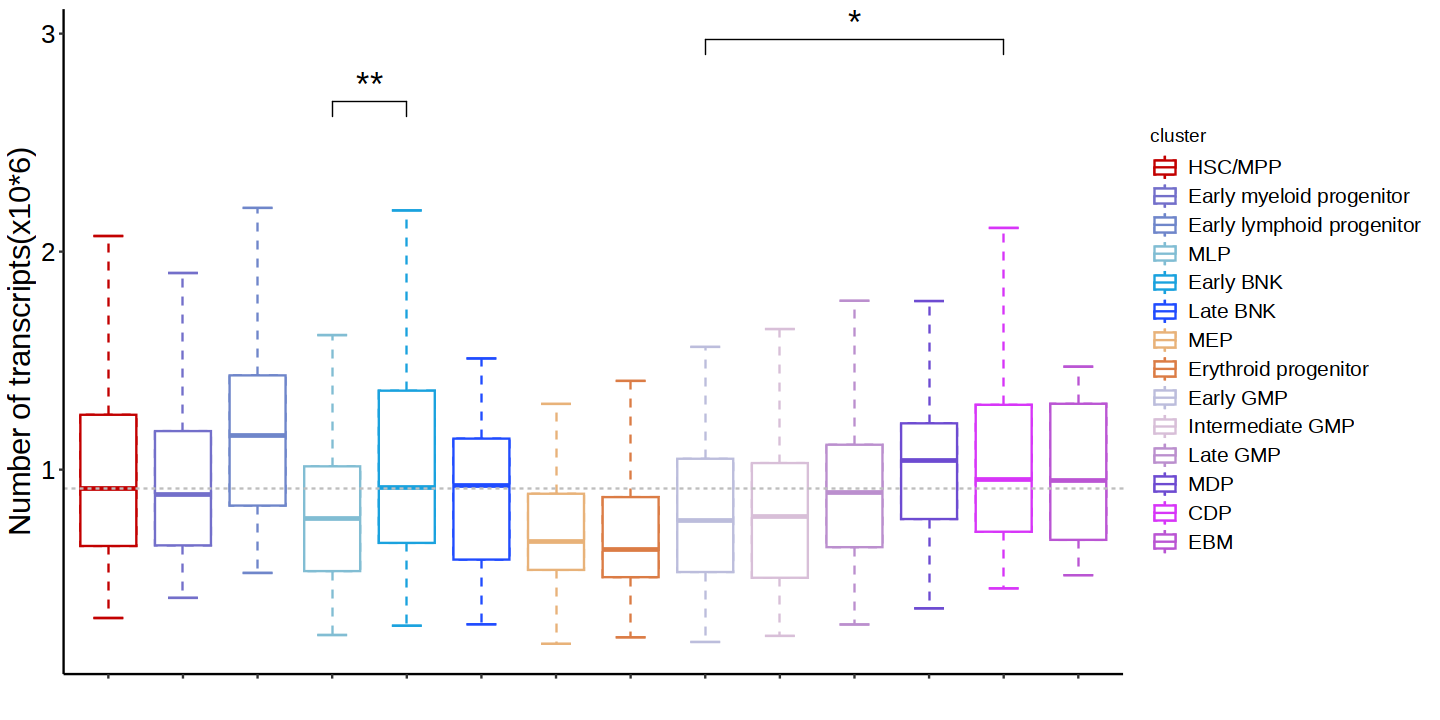

In [381]:
# RNA transcript
transcript <- umap[, c("cluster", "transcript2")] %>% 
                setNames(c("cluster", "value")) %>% 
                rmoutliers(., level) %>%
                filter(., cluster != "Unknown")
ggplot(transcript, aes(x=cluster, y=value, color=cluster)) +
    geom_boxplot(linetype="99", outlier.shape = NA) + 
    stat_boxplot(geom = "errorbar",aes(ymin=..ymax..),
               width=0.4) + 
    stat_boxplot(geom = "errorbar",aes(ymax=..ymin..),
               width=0.4) + 
    stat_boxplot(aes(ymin=..lower..,ymax=..upper.., color=cluster), outlier.shape = NA) +
    scale_color_manual(values=col) +
    theme_classic() +
    stat_compare_means(comparisons = list(c("MLP", "Early BNK"),  c("Early GMP", "CDP")), map_signif_level = T,
                       step_increase=0.05, tip_length=0, method="t.test", 
                       size = 7, textsize = 6, label = "p.signif") +
    geom_hline(yintercept = mean(transcript$value), lty = 2, color="grey") + 
    xlab("") + ylab("Number of transcripts(x10*6)") +
    theme(axis.text.x = element_blank()) + 
    cPlotOpts

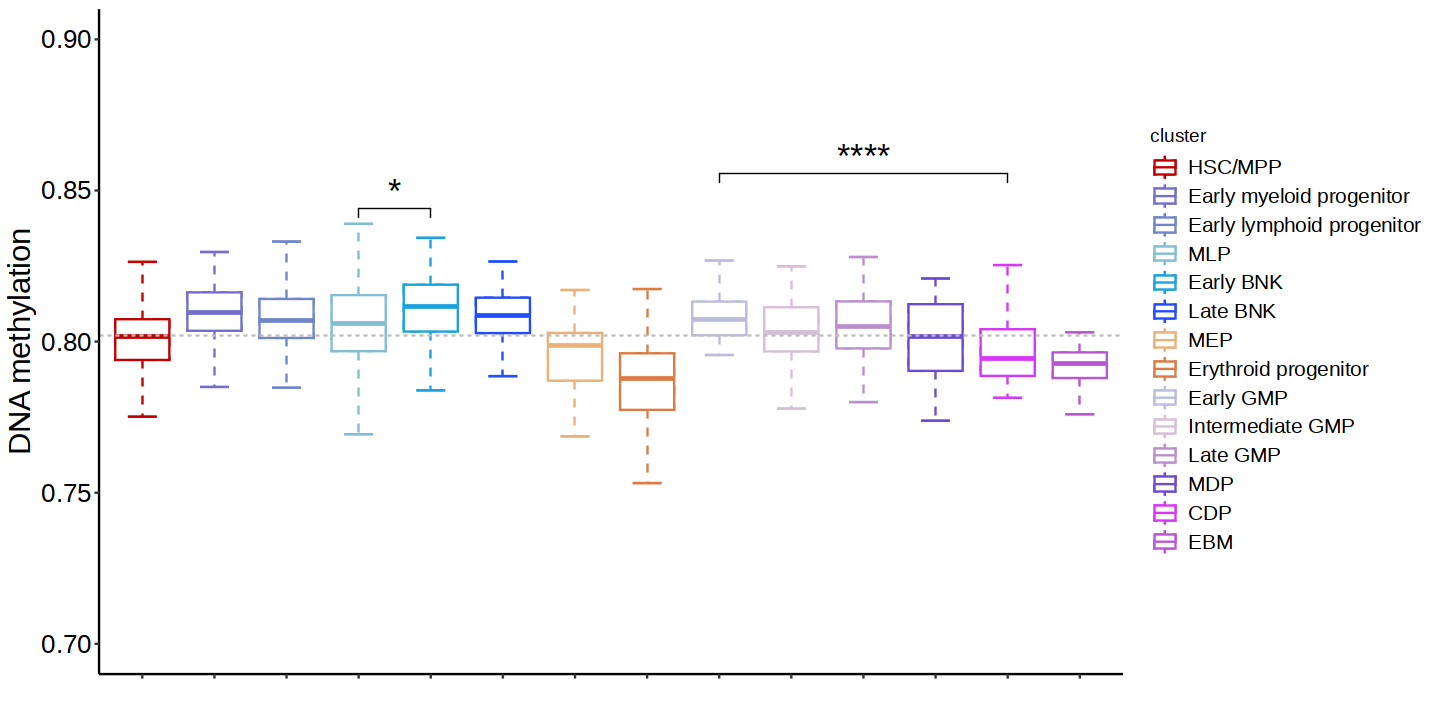

In [379]:
# DNA methylation
methylation <- umap[, c("cluster", "methylation")] %>% 
                setNames(c("cluster", "value")) %>% 
                rmoutliers(., level) %>%
                filter(., cluster != "Unknown")
ggplot(methylation, aes(x=cluster, y=value, color=cluster)) +
    geom_boxplot(linetype="99", outlier.shape = NA) + 
    stat_boxplot(geom = "errorbar",aes(ymin=..ymax..),
               width=0.4) + 
    stat_boxplot(geom = "errorbar",aes(ymax=..ymin..),
               width=0.4) + 
    stat_boxplot(aes(ymin=..lower..,ymax=..upper.., color=cluster), outlier.shape = NA) +
    scale_color_manual(values=col) +
    theme_classic() +
    stat_compare_means(comparisons = list(c("MLP", "Early BNK"),  c("Early GMP", "CDP")), map_signif_level = T,
                       step_increase=0.05, tip_length=0, method="t.test", 
                       size = 7, textsize = 6, label = "p.signif") +
    geom_hline(yintercept = mean(methylation$value), lty = 2, color="grey") + 
    xlab("") + ylab("DNA methylation") +
    coord_cartesian(ylim = c(0.7, 0.9)) + 
    theme(axis.text.x = element_blank()) + 
    cPlotOpts

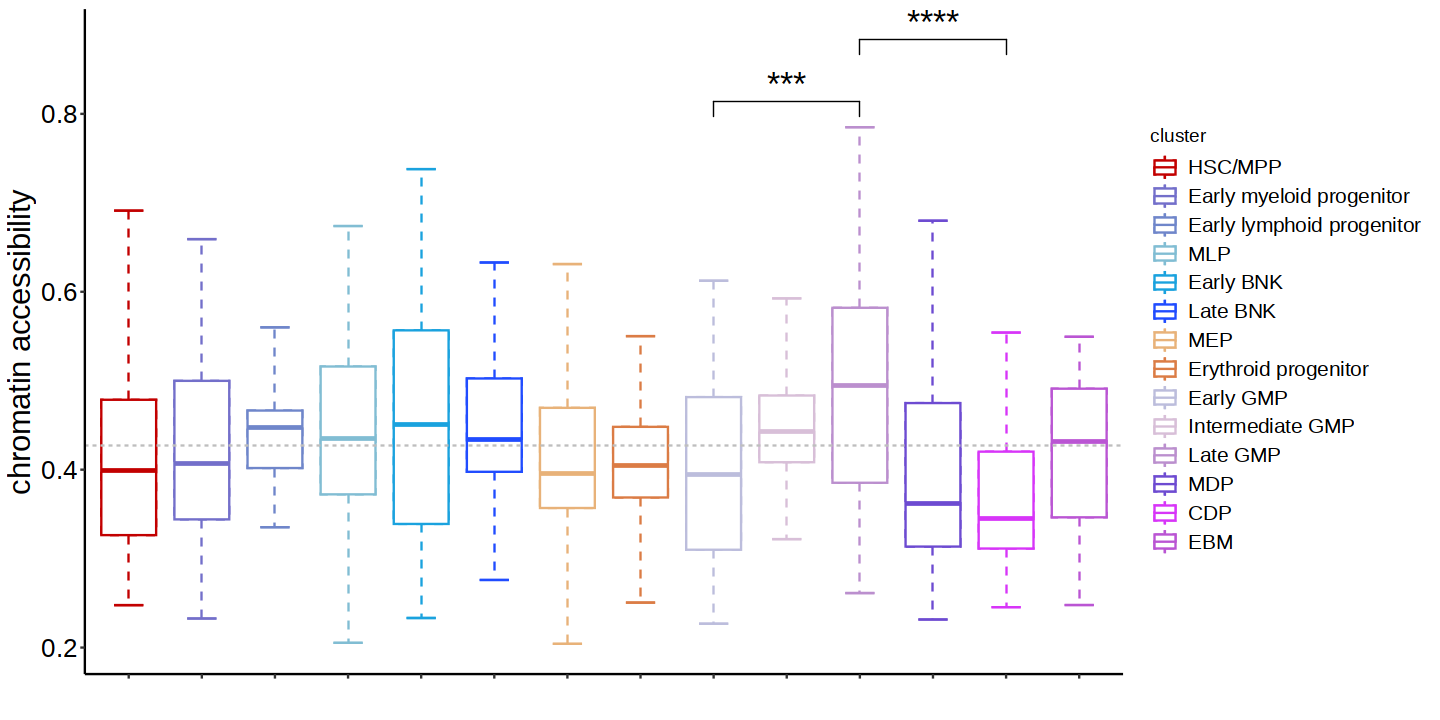

In [380]:
# chromatin accessibility
accessibility <- umap[, c("cluster", "accessibility")] %>% 
                setNames(c("cluster", "value")) %>% 
                rmoutliers(., level) %>%
                filter(., cluster != "Unknown")
ggplot(accessibility, aes(x=cluster, y=value, color=cluster)) +
    geom_boxplot(linetype="99", outlier.shape = NA) + 
    stat_boxplot(geom = "errorbar",aes(ymin=..ymax..),
               width=0.4) + 
    stat_boxplot(geom = "errorbar",aes(ymax=..ymin..),
               width=0.4) + 
    stat_boxplot(aes(ymin=..lower..,ymax=..upper.., color=cluster), outlier.shape = NA) +
    scale_color_manual(values=col) +
    theme_classic() +
    stat_compare_means(comparisons = list(c("Early GMP", "Late GMP"),  c("Late GMP", "CDP")), map_signif_level = T,
                       step_increase=0.05, tip_length=0, method="t.test", 
                       size = 7, textsize = 6, label = "p.signif") +
    geom_hline(yintercept = mean(accessibility$value), lty = 2, color="grey") + 
    xlab("") + ylab("chromatin accessibility") +
    theme(axis.text.x = element_blank()) + 
    cPlotOpts

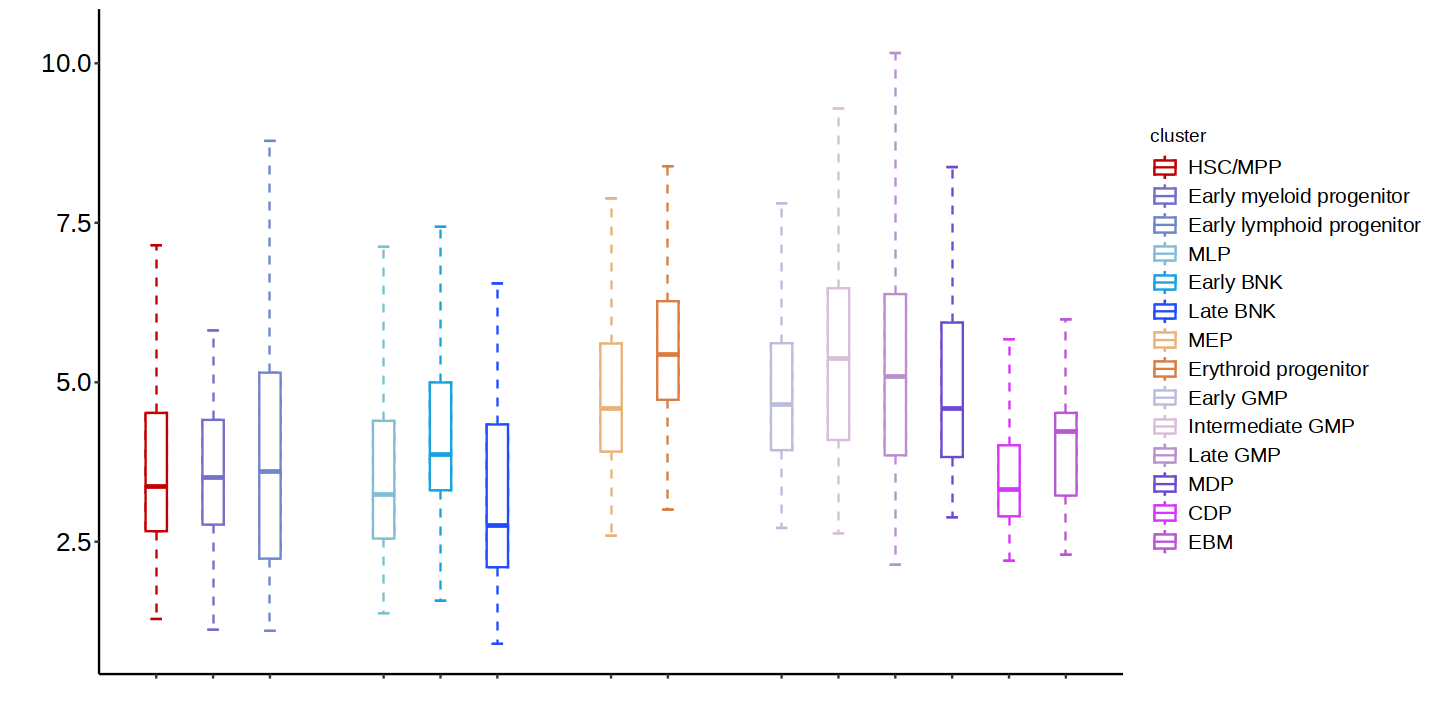

In [362]:
ggplot(gene_count, aes(x=as.numeric(factor(cluster)), y=value, color=cluster)) +
    geom_boxplot(linetype="99", outlier.shape = NA, position = position_nudge(x =  c(1:3, 6:8, 11:12, 15:20))) + 
    stat_boxplot(geom = "errorbar",aes(ymin=..ymax..),
               width=0.4, position = position_nudge(x =  c(1:3, 6:8, 11:12, 15:20))) + 
    stat_boxplot(geom = "errorbar",aes(ymax=..ymin..),
               width=0.4, position = position_nudge(x =  c(1:3, 6:8, 11:12, 15:20))) + 
    stat_boxplot(aes(ymin=..lower..,ymax=..upper.., color=cluster), outlier.shape = NA, position = position_nudge(x =  c(1:3, 6:8, 11:12, 15:20))) +
    scale_color_manual(values=col) +
    scale_x_continuous(breaks = c(1:3*2, seq(10,14, 2), seq(18,20, 2), seq(24,34, 2)), labels = unique(gene_count$cluster)) +
    theme_classic() +
    theme(axis.text.x = element_blank()) + 
    xlab("") + ylab("") + 
    cPlotOpts

### Fig 1e & 1f

In [439]:
load("~/HSPC_zenedo/Fig1/fig1ef.RData")

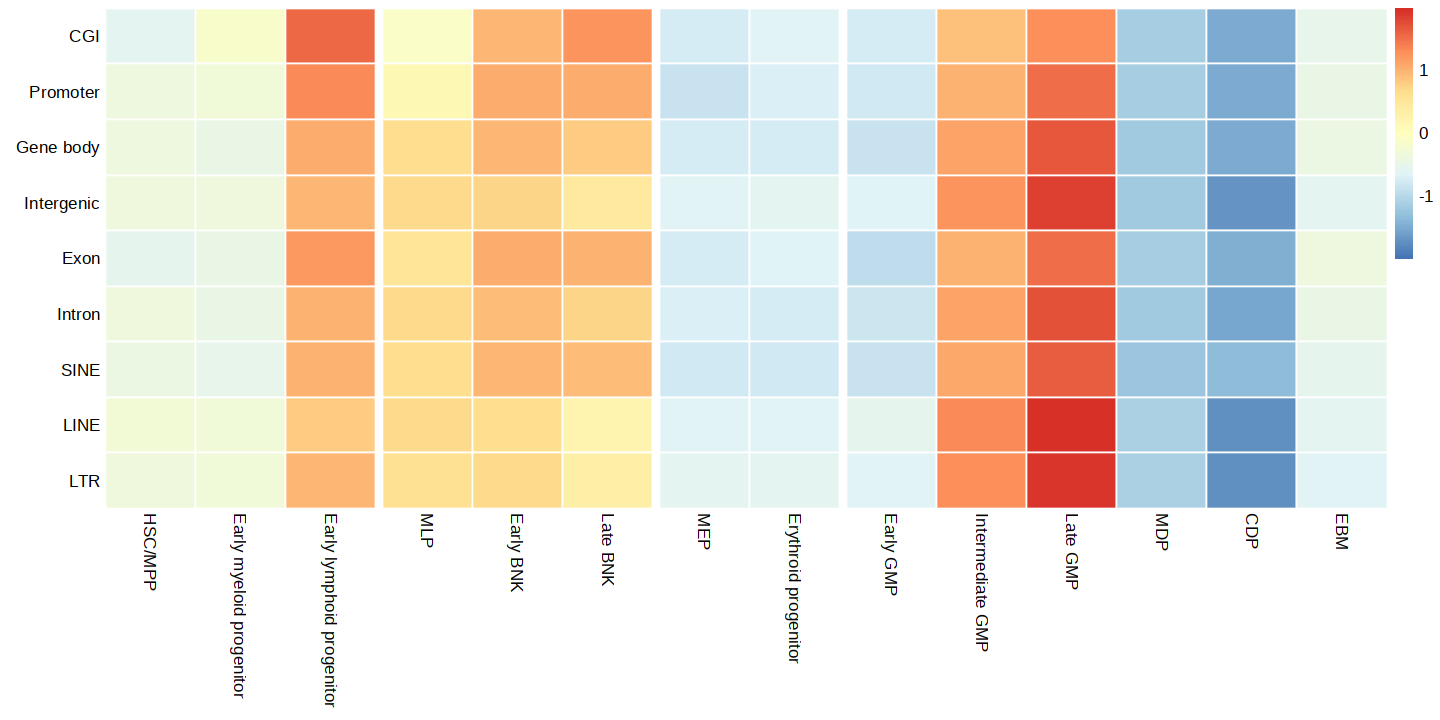

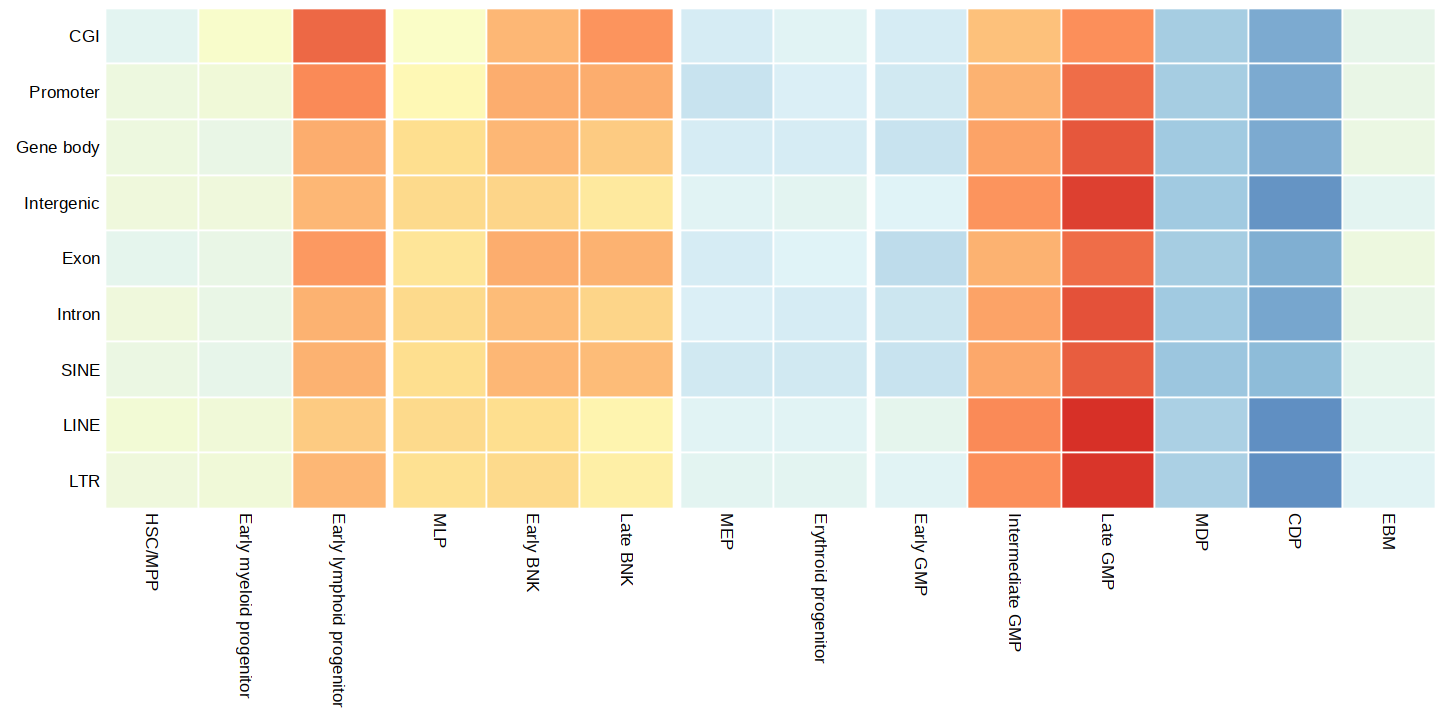

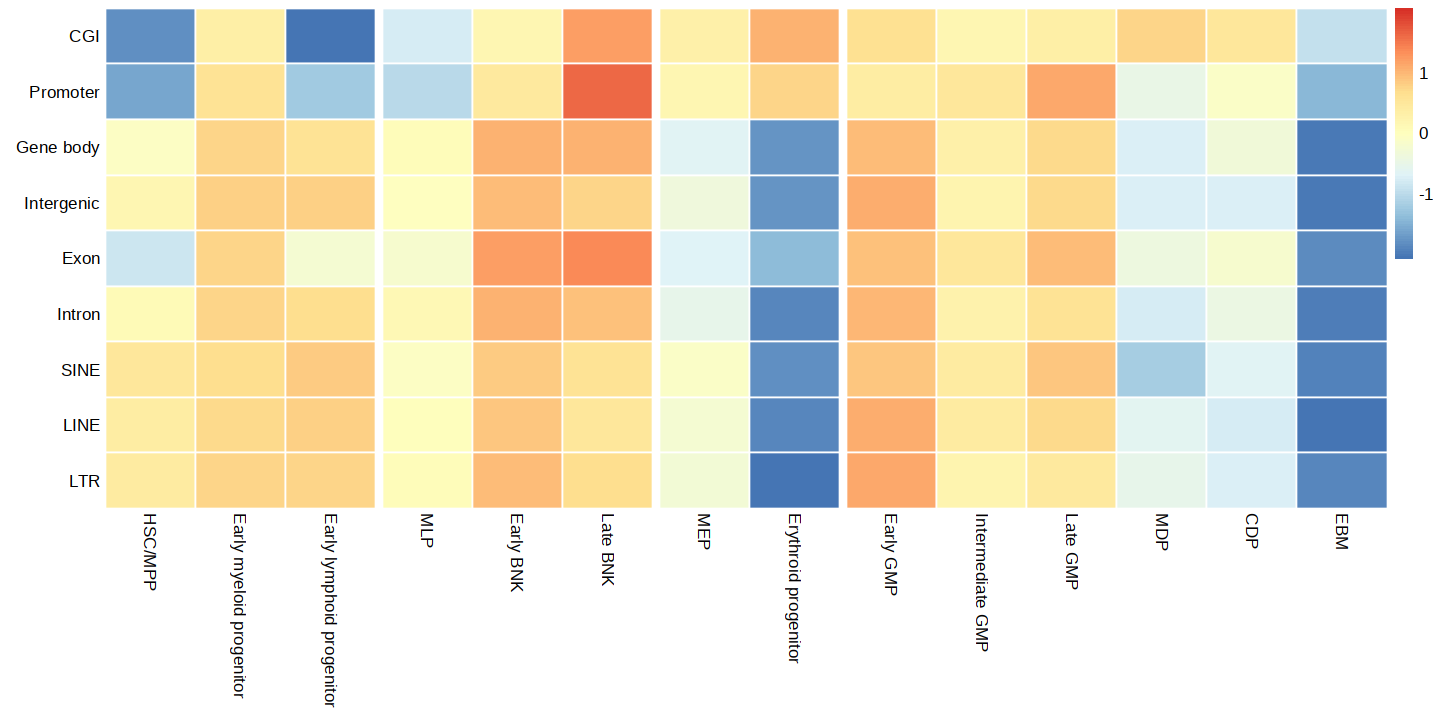

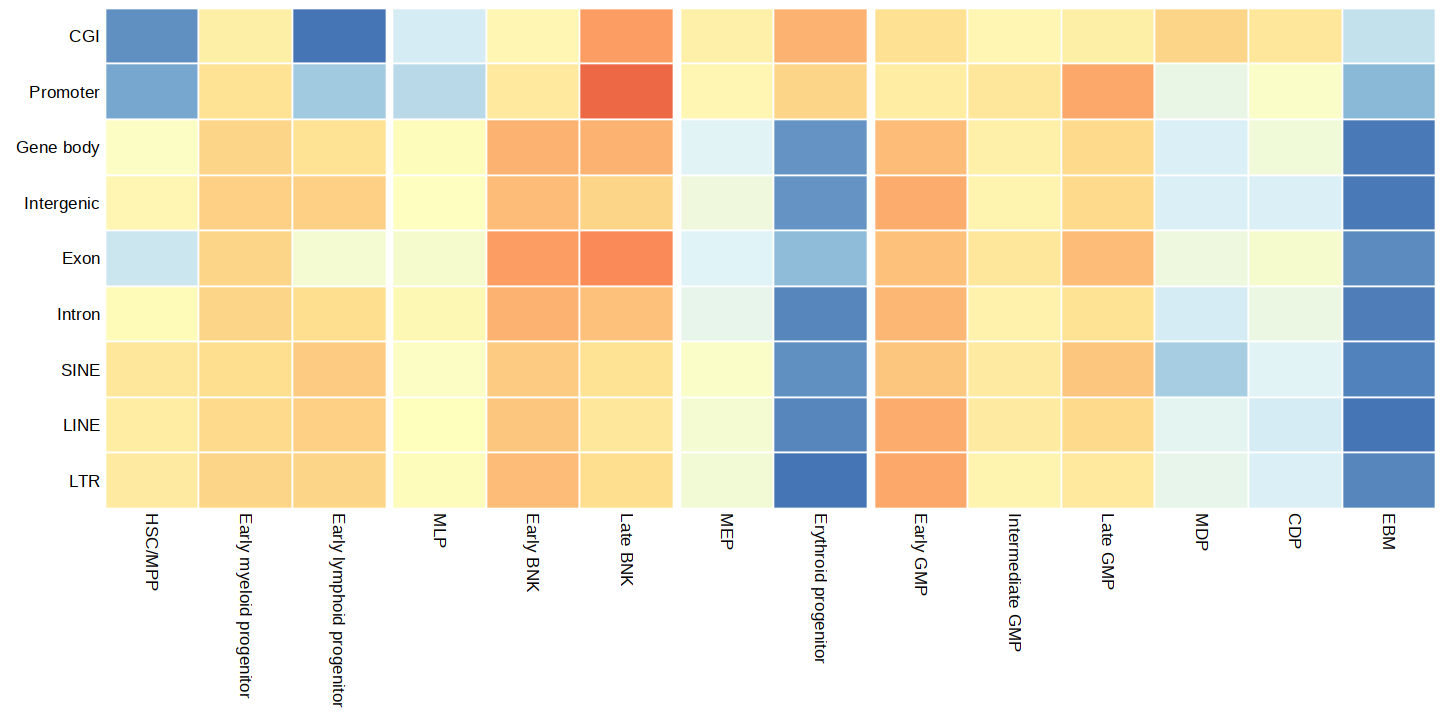

In [625]:
# Chromatin accessibility
p1 <- pheatmap(acc[, 1:(ncol(acc)-1)], scale="row", cluster_cols = F, cluster_rows = F, border_color = "white", legend_breaks=seq(-1, 1), 
               gaps_col = c(3, 6, 8),  legend=TRUE)
p3 <- pheatmap(acc[, 1:(ncol(acc)-1)], scale="row", cluster_cols = F, cluster_rows = F, border_color = "white", legend_breaks=seq(-1, 1), 
               gaps_col = c(3, 6, 8),  legend=FALSE)
legend.grob <- p1$gtable$grob[[4]]  
legend.grob$children[[1]]$y <- legend.grob$children[[1]]$y - unit(0.85,"inches") 
legend.grob$children[[2]]$y <- legend.grob$children[[2]]$y - unit(0.85,"inches") 
legend.grob$children[[1]]$x <- legend.grob$children[[1]]$x + unit(0.4,"inches") 
legend.grob$children[[2]]$x <- legend.grob$children[[2]]$x + unit(0.4,"inches")
leg_label <- textGrob(str_wrap("Chromatin accessibility", width=9),x=0,y=0.9,hjust=0,vjust=0,gp=gpar(fontsize=10,fontface="bold"))
legend.grob2 <- addGrob(legend.grob,leg_label)
p2 <- met %>% rownames_to_column("region") %>% 
    .[, c("region", "mean")] %>%
    mutate(region=factor(region, levels=.$region[nrow(acc):1])) %>% 
    ggplot(., aes(x=mean, y=region)) + 
        geom_bar(stat="identity", fill="#96C2CA", width=0.6) +
        xlim(c(0, 1)) + 
        theme_classic() + 
        xlab("Chromatin accessibility") + ylab("") + 
        theme(axis.text.y = element_blank(), 
             axis.text = element_text(size=10, color="black")) + 
        geom_text(label=sprintf("%0.3f", acc$mean), size=3, hjust=-.1) 

# DNA methylation
p4 <- pheatmap(met[, 1:(ncol(met)-1)], scale="row", cluster_cols = F, cluster_rows = F, border_color = "white", legend_breaks=seq(-1, 1), 
               gaps_col = c(3, 6, 8),  legend=TRUE)
p6 <- pheatmap(met[, 1:(ncol(met)-1)], scale="row", cluster_cols = F, cluster_rows = F, border_color = "white", legend_breaks=seq(-1, 1), 
               gaps_col = c(3, 6, 8),  legend=FALSE)
legend.grob_m <- p4$gtable$grob[[4]]  
legend.grob_m$children[[1]]$y <- legend.grob_m$children[[1]]$y - unit(0.85,"inches") 
legend.grob_m$children[[2]]$y <- legend.grob_m$children[[2]]$y - unit(0.85,"inches") 
legend.grob_m$children[[1]]$x <- legend.grob_m$children[[1]]$x + unit(0.4,"inches") 
legend.grob_m$children[[2]]$x <- legend.grob_m$children[[2]]$x + unit(0.4,"inches")
leg_label_m <- textGrob("DNA methylation",x=0,y=0.9,hjust=0,vjust=0,gp=gpar(fontsize=10,fontface="bold"))
legend.grob2_m <- addGrob(legend.grob_m,leg_label_m)
p5 <- met %>% rownames_to_column("region") %>% 
    .[, c("region", "mean")] %>%
    mutate(region=factor(region, levels=.$region[nrow(met):1])) %>% 
    ggplot(., aes(x=mean, y=region)) + 
        geom_bar(stat="identity", fill="#96C2CA", width=0.6) +
        xlim(c(0, 1)) + 
        theme_classic() + 
        xlab("DNA methylation") + ylab("") + 
        theme(axis.text.y = element_blank(), 
             axis.text = element_text(size=10, color="black")) + 
        geom_text(label=sprintf("%0.3f", met$mean), size=3, hjust=-.1) 


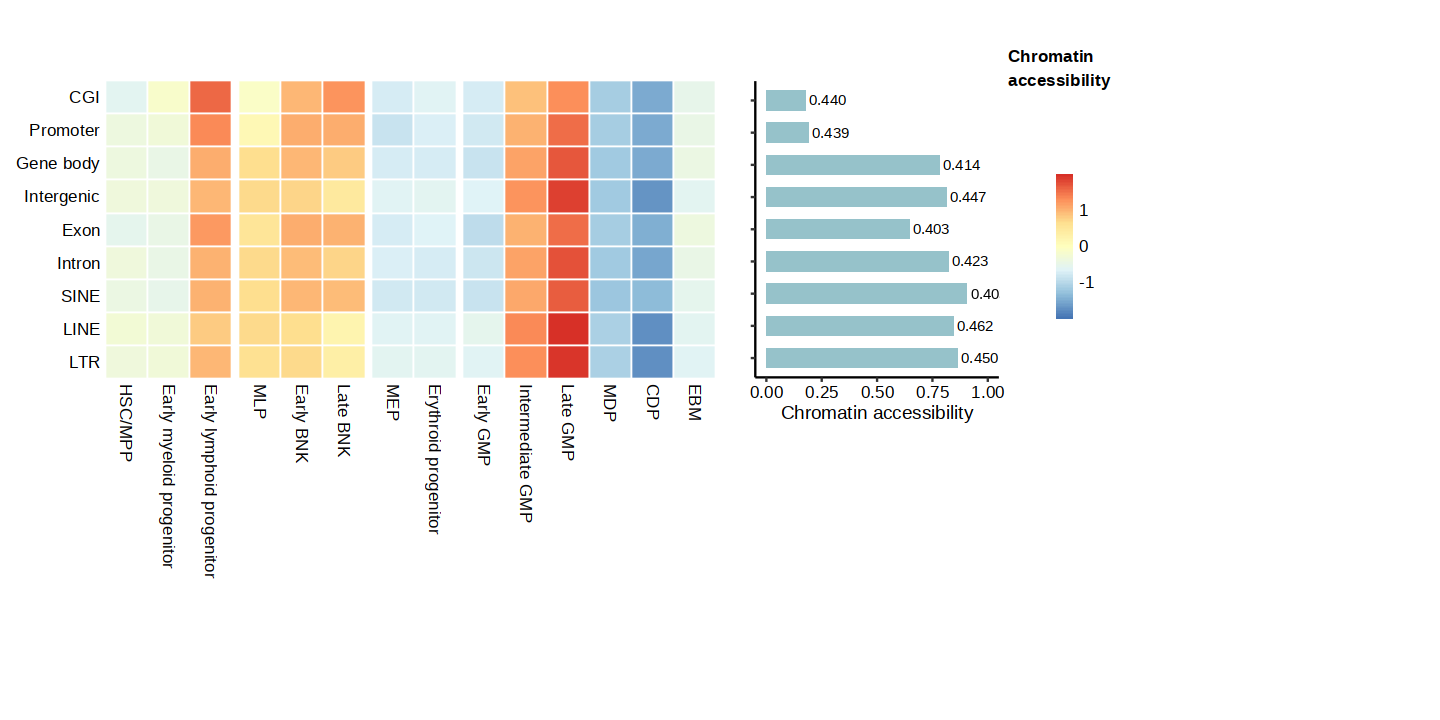

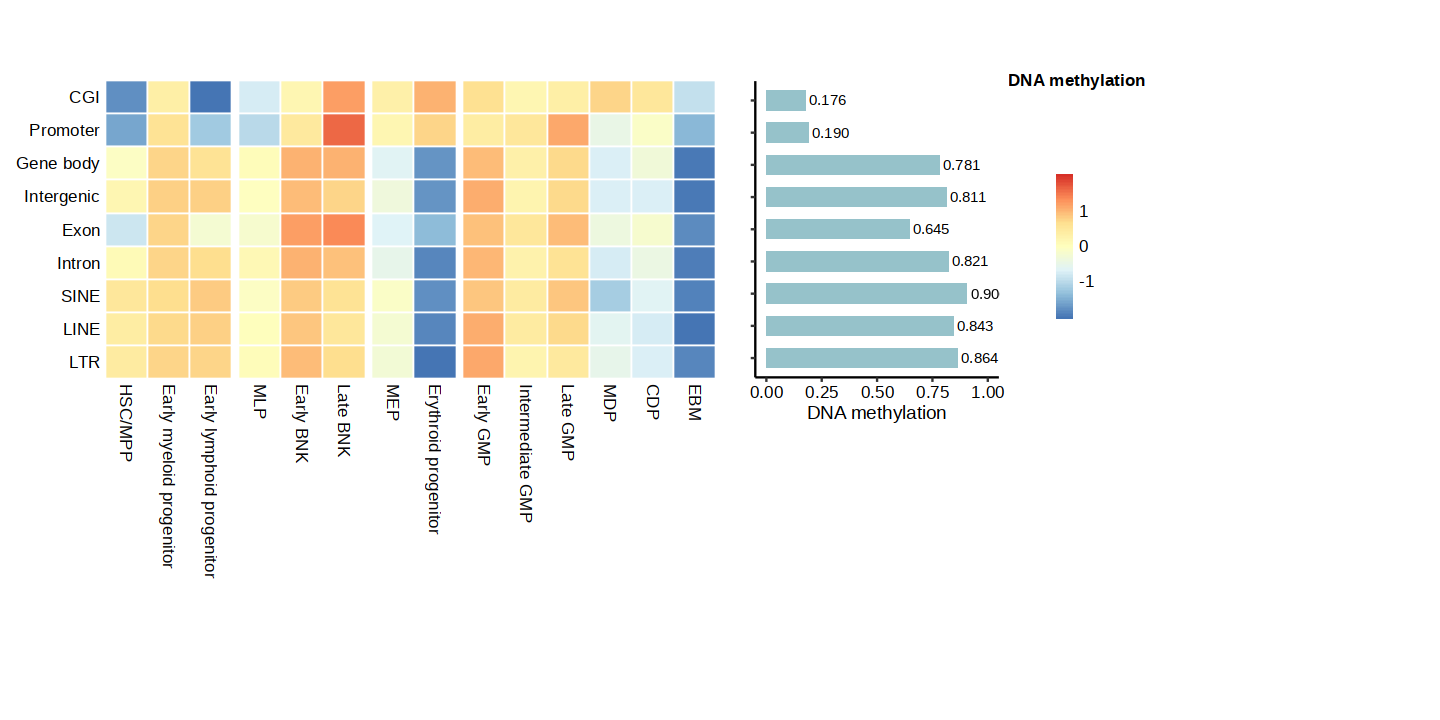

In [630]:
ggdraw() + 
    draw_plot(p3$gtable, x = 0, y = .18, width = .5, height = .72) +
    draw_plot(p2, x = .5, y = .4, width = .2, height = .5) +
    draw_plot(legend.grob2, x = 0.7, y = .7, height = 0.2)
ggdraw() + 
    draw_plot(p6$gtable, x = 0, y = .18, width = .5, height = .72) +
    draw_plot(p5, x = .5, y = .4, width = .2, height = .5) +
    draw_plot(legend.grob2_m, x = 0.7, y = .7, height = 0.2)